In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

plt.rcParams['figure.figsize'] = (7, 3.5)

In [2]:
x = np.fromfile('zsat_syms.f32', 'float32')

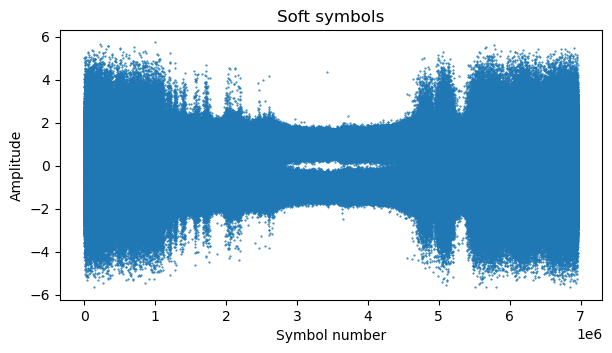

In [3]:
plt.plot(x, '.', markersize=1)
plt.title('Soft symbols')
plt.xlabel('Symbol number')
plt.ylabel('Amplitude');

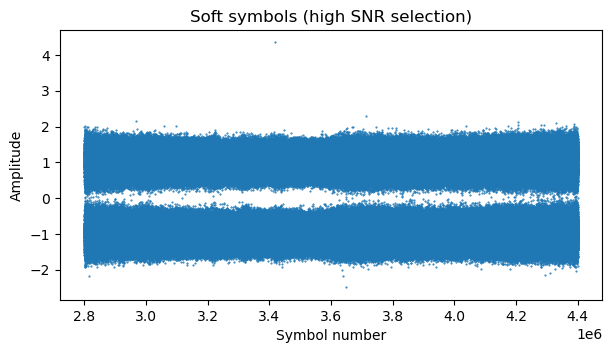

In [4]:
sel = slice(2_800_000, 4_400_000)
y = x[sel]
plt.plot(np.arange(x.size)[sel], y, '.', markersize=1)
plt.title('Soft symbols (high SNR selection)')
plt.xlabel('Symbol number')
plt.ylabel('Amplitude');

In [5]:
corr = scipy.signal.correlate(y, y, mode='full')

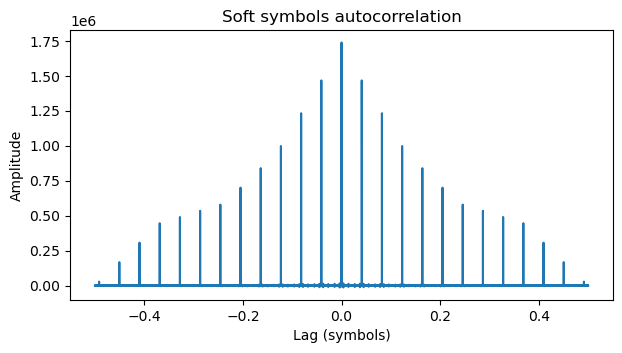

In [6]:
plt.plot(np.fft.fftshift(np.fft.fftfreq(corr.size)), corr)
plt.title('Soft symbols autocorrelation')
plt.xlabel('Lag (symbols)')
plt.ylabel('Amplitude');

In [7]:
np.argmax(corr[corr.size//2+1:]) + 1

np.int64(131071)

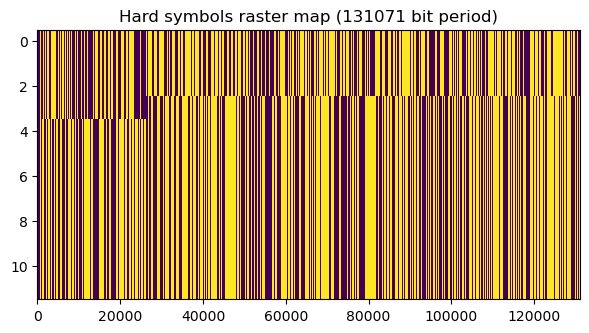

In [8]:
L = 131071
z = y[:y.size//L*L].reshape(-1, L)
plt.imshow(np.sign(z), aspect='auto', interpolation='None')
plt.title('Hard symbols raster map (131071 bit period)');

In [9]:
2**17-1

131071

In [10]:
np.argmax(np.abs(np.fft.ifft(np.fft.fft(np.roll(z[0], 1)) * np.conjugate(np.fft.fft(z[-1])))))

np.int64(0)

In [11]:
np.average(np.sign(np.roll(z[0], 1)) == np.sign(z[-1]))

np.float64(0.9999313349253458)